# Lab 2.2.1 Insights from Titanic Dataset

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [4]:
# Read Titanic Dataset
titanic_csv = 'train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [5]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [6]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [7]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [8]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [9]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [11]:
# ANSWER
titanic['Age'].mean()
titanic['Age'].fillna(30, inplace = True)
titanic.tail()
#mean is closest to the actual number

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Cabin

In [12]:
# ANSWER
titanic['Cabin'].fillna("N.A.", inplace = True)
print(titanic['Cabin'].unique())
titanic['Cabin_Separated'] = titanic['Cabin'].str[0]
titanic.groupby(['Pclass'])['Cabin_Separated'].value_counts()
#groupby Pclass
#It is ok not to have a value for cabin if no information is provided

['N.A.' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


Pclass  Cabin_Separated
1       C                   59
        B                   47
        N                   40
        D                   29
        E                   25
        A                   15
        T                    1
2       N                  168
        F                    8
        D                    4
        E                    4
3       N                  479
        F                    5
        G                    4
        E                    3
Name: Cabin_Separated, dtype: int64

### Embarked

In [13]:
# ANSWER
titanic['Embarked'].fillna("N.A.", inplace = True)
#It is ok not to have a value for Embarked if no information is provided

# Describe

Describe your dataset.

In [14]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    object 
 11  Embarked         891 non-null    object 
 12  Cabin_Separated  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [16]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    df = titanic['Survived']
    feature = titanic.columns()

    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

<AxesSubplot:xlabel='Survived'>

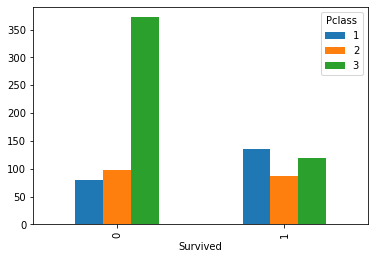

In [17]:
# ANSWER
groupof = titanic.groupby('Survived')['Pclass']
groupof.value_counts().unstack().plot(kind="bar")

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

<AxesSubplot:xlabel='Survived'>

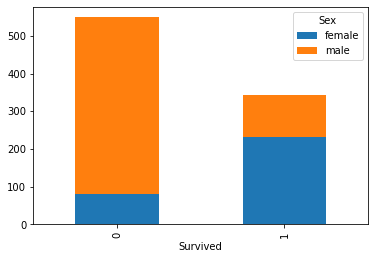

In [91]:
groupof = titanic.groupby('Survived')['Sex']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

## Parch

Parch = Number of parents of children travelling with each passenger.

<AxesSubplot:xlabel='Survived'>

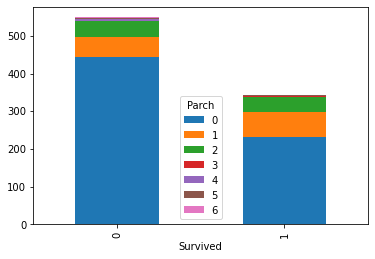

In [92]:
# ANSWER
groupof = titanic.groupby('Survived')['Parch']
groupof.value_counts().unstack().plot(kind="bar",stacked="True", )

## SibSp

Use barchart to find relationship between survived and SibSp. Note your findings.

<AxesSubplot:xlabel='Survived'>

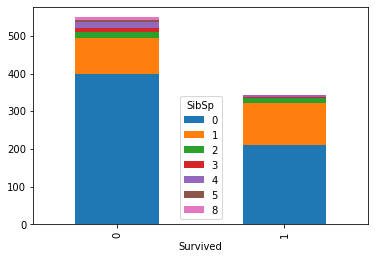

In [93]:
# ANSWER
groupof = titanic.groupby('Survived')['SibSp']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

## Embarked

Use barchart to find relationship between survived and port of embarkation. Note your findings.

<AxesSubplot:xlabel='Survived'>

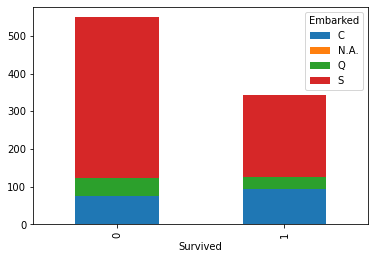

In [94]:
# ANSWER
groupof = titanic.groupby('Survived')['Embarked']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class (i.e. column 'FareClass') based on the following function applied to their fare. Is there any relationship between fare and survival? 

In [95]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [96]:
# ANSWER
titanic['Fare Class'] = titanic.Fare.apply(create_fare_class)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Separated,Fare Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N.A.,S,N,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N.A.,S,N,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N.A.,S,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N.A.,S,N,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,N.A.,S,N,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,2


## Age Class

In [97]:
# ANSWER

In [98]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [99]:
# ANSWER
titanic['Age Class'] = titanic.Age.apply(create_age_class)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Separated,Fare Class,Age Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N.A.,S,N,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N.A.,S,N,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N.A.,S,N,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N.A.,S,N,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,N.A.,S,N,2,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,2,3


# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [100]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare Class,Age Class
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658,0.003258,0.026653
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307,-0.307600,-0.067911
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500,0.719670,-0.292128
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632,-0.107444,0.934446
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651,-0.380692,-0.232166
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225,-0.387100,-0.168121
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000,-0.599129,0.075551
Fare Class,0.003258,-0.307600,0.719670,-0.107444,-0.380692,-0.387100,-0.599129,1.000000,-0.080506
Age Class,0.026653,-0.067911,-0.292128,0.934446,-0.232166,-0.168121,0.075551,-0.080506,1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data (samples), one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is N = 100.

In [101]:
# ANSWER

N = 100
titanic_young = titanic[titanic['Age'] < 35].sample(N)
titanic_old = titanic[titanic['Age'] > 35].sample(N)
titanic_young


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Separated,Fare Class,Age Class
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,N.A.,S,N,2,2
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,N.A.,S,N,4,2
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,N.A.,S,N,3,3
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,N.A.,S,N,1,2
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,N.A.,S,N,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,N.A.,S,N,1,1
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,N.A.,C,N,4,3
128,129,1,3,"Peter, Miss. Anna",female,30.0,1,1,2668,22.3583,F E69,C,F,2,3
459,460,0,3,"O'Connor, Mr. Maurice",male,30.0,0,0,371060,7.7500,N.A.,Q,N,4,3


In [102]:
titanic_old

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Separated,Fare Class,Age Class
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,N.A.,S,N,2,4
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,N.A.,Q,N,3,4
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,B,1,4
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,N.A.,Q,N,4,5
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,B,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,A,1,4
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,B,1,4
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,C,1,4
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S,D,1,5


### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [103]:
# ANSWER

alpha = 0.05

### Calculate point estimate

In [104]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [105]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [106]:
var_a

0.24030303030303055

### Calculate test statistic

In [107]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [108]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [109]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 0.2899593646030753
p = 0.7721507566913002


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [110]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [111]:
print_sig(p, alpha)

We fail to reject our null hypothesis.


In [112]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 0.2899593646030755
p = 0.7721507566913002
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



